# Data Science from Scratch - First Principles with Python

## 1. Introduction

### Finding Key Connectors

In [28]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


# First we set each user’s friends property to an empty list
for user in users:
    user["friends"] = []

In [29]:
# Then, populate the lists using the friendships data
for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

def number_of_friends(user):
    """how many friends does _user_ have?"""
    return len(user["friends"]) # length of friend_ids list

total_connections = sum(number_of_friends(user)
                        for user in users) # 24

# Verify the number of connections
print("Total connections: ", total_connections)

Total connections:  24


In [30]:
from __future__ import division
num_users = len(users)
print("Users' number: ", num_users)
avg_connections = total_connections / num_users # 2.4
print("Average connections: ", avg_connections)

Users' number:  11
Average connections:  2.1818181818181817


In [68]:
# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
sorted(num_friends_by_id, # get it sorted
    key=lambda user_id: user_id[1], # by num_friends
    reverse=True
) # largest to smallest

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1),
 (10, 0)]

### Data Scientists You May Know

In [70]:
def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"]
            for friend in user["friends"] # for each of user's friends
            for foaf in friend["friends"]] # get each of _their_ friends

friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [72]:
print([friend["id"] for friend in users[0]["friends"]]) # [1, 2]
print([friend["id"] for friend in users[1]["friends"]]) # [0, 2, 3]
print([friend["id"] for friend in users[2]["friends"]]) # [0, 1, 3]

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [73]:
from collections import Counter # not loaded by default

def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]  # for each of my friends
                   for foaf in friend["friends"]  # count *their* friends
                   if not_the_same(user, foaf)    # who aren't me
                   and not_friends(user, foaf))   # and aren't my friends

print(friends_of_friend_ids(users[3])) # Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


In [74]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

data_scientists_who_like("Big Data")

[0, 8, 9]

In [94]:
from collections import defaultdict

# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
    
def most_common_interests_with(user_id):
    return Counter(interested_user_id 
                   for interest in interests_by_user_id["user_id"] 
                   for interested_user_id in user_ids_by_interest[interest]
                   if interested_user_id != user_id)

### Salaries and Experience

In [82]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

# keys are years values are the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

In [84]:
def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items() # in Python 3 we should use "items" instead of "iteritems"
}

average_salary_by_bucket

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}

### Paid Accounts

In [86]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0: return "paid"
  elif years_experience < 8.5: return "unpaid"
  else: return "paid"

predict_paid_or_unpaid(4)

'unpaid'

### Topics of Interest

In [89]:
words_and_counts = Counter(word 
                           for user, interest in interests 
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

learning 3
data 3
java 3
python 3
big 3
neural 2
r 2
hadoop 2
hbase 2
scikit-learn 2
regression 2
machine 2
cassandra 2
statistics 2
networks 2
probability 2


## 2. A Crash Course in Python

### Whitespace Formatting

In [99]:
# Python uses identation
for i in [1, 2, 3, 4, 5]:
    print(i) # first line in "for i" block
    for j in [1, 2, 3, 4, 5]:
        print(j) # first line in "for j" block
        print(i + j) # last line in "for j" block
    print(i) # last line in "for i" block
print("done looping")

1
1
2
2
3
3
4
4
5
5
6
1
2
1
3
2
4
3
5
4
6
5
7
2
3
1
4
2
5
3
6
4
7
5
8
3
4
1
5
2
6
3
7
4
8
5
9
4
5
1
6
2
7
3
8
4
9
5
10
5
done looping


In [101]:
# Whitespace is ignored inside parenthesis and brackets
long_winded_computation = (1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 11 + 12 + 
                           13 + 14 + 15 + 16 + 17 + 18 + 19 + 20)
long_winded_computation

210

In [103]:
# Also is use for making code easier to read
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
easier_to_read_list_of_lists = [ [1, 2, 3], 
                                [4, 5, 6], 
                                [7, 8, 9] ]

# We use the backslash to indicate that statement continues onto the next line
two_plus_three = 2 + \
                 3

### Modules

In [106]:
# Certain features are not loaded by default
import re
my_regex = re.compile("[0-9]+", re.I)
print("First regex: ", my_regex)

# If you already had a different re in your code you could use an alias
import re as regex
my_regex = regex.compile("[0-9]+", regex.I)
print("Second regex: ", my_regex)

First regex:  re.compile('[0-9]+', re.IGNORECASE)
Second regex:  re.compile('[0-9]+', re.IGNORECASE)


In [109]:
# You also might need a specific values from a module
from collections import defaultdict, Counter
lookup = defaultdict(int)
my_counter = Counter()
print("Lookup: ", lookup)
print("Counter: ", my_counter)

Lookup:  defaultdict(<class 'int'>, {})
Counter:  Counter()


### Functions

In [110]:
def double(x):
    """this is where you put an optional docstring
    that explains what the function does.
    for example, this function multiplies its input by 2"""
    return x * 2

double(3)

6

In [112]:
def apply_to_one(f):
    """calls the function f with 1 as its argument"""
    return f(1)

my_double = double # refers to the previously defined function
x = apply_to_one(my_double) # equals 2
x

2

In [115]:
# Short anonymous function or lambda function
y = apply_to_one(lambda x: x + 4) # equals 5
y

5

In [116]:
# Is possible to assign lambda function to a variable
another_double = lambda x: 2 * x # don't do this
def another_double(x): return 2 * x # do this instead

In [118]:
# Functions also have default parameters values
def my_print(message="my default message"):
    print(message)

my_print("hello") # prints 'hello'
my_print() # prints 'my default message'

hello
my default message


In [119]:
# Is useful to specify arguments by name
def subtract(a=0, b=0):
    return a - b

subtract(10, 5) # returns 5
subtract(0, 5) # returns -5
subtract(b=5) # same as previous

-5

### Lists

In [134]:
# Creating a list
x = list(range(10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [135]:
# Get the value at index 1
print("Element of index 1: ", x[1])

Element of index 1:  1


In [136]:
zero = x[0] # equals 0, lists are 0-indexed
one = x[1] # equals 1
nine = x[-1] # equals 9, 'Pythonic' for last element
eight = x[-2] # equals 8, 'Pythonic' for next-to-last element
x[0] = -1 # now x is [-1, 1, 2, 3, ..., 9]
x

[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [137]:
# Get the elements by slicing the list
first_three = x[:3] # [-1, 1, 2]
three_to_end = x[3:] # [3, 4, ..., 9]
one_to_four = x[1:5] # [1, 2, 3, 4]
last_three = x[-3:] # [7, 8, 9]
without_first_and_last = x[1:-1] # [1, 2, ..., 8]
copy_of_x = x[:] # [-1, 1, 2, ..., 9]
print("First three: ", first_three)
print("From three to the end: ", three_to_end)
print("From one to four: ", one_to_four)
print("Last three: ", last_three)
print("Without first and last: ", without_first_and_last)
print("Copy: ", copy_of_x)

First three:  [-1, 1, 2]
From three to the end:  [3, 4, 5, 6, 7, 8, 9]
From one to four:  [1, 2, 3, 4]
Last three:  [7, 8, 9]
Without first and last:  [1, 2, 3, 4, 5, 6, 7, 8]
Copy:  [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [138]:
# Concatenate a list
x = [1, 2, 3]
x.extend([4, 5, 6]) # x is now [1,2,3,4,5,6]
x

[1, 2, 3, 4, 5, 6]

In [140]:
# You can use a list addition
x = [1, 2, 3]
y = x + [4, 5, 6] # y is [1, 2, 3, 4, 5, 6]; x is unchanged
print("List x: ", x)
print("List y: ", y)

List x:  [1, 2, 3]
List y:  [1, 2, 3, 4, 5, 6]


### Tuples

In [142]:
# Define a tuple using parenthesis instead of square brackets
my_list = [1, 2]
my_tuple = (1, 2)
other_tuple = 3, 4
my_list[1] = 3 # my_list is now [1, 3]

try:
    my_tuple[1] = 3
except TypeError:
    print("cannot modify a tuple")

cannot modify a tuple


In [145]:
# Tuples help to retrieve multiple values from functions
def sum_and_product(x, y):
    return (x + y),(x * y)

sp = sum_and_product(2, 3) # equals (5, 6)
s, p = sum_and_product(5, 10) # s is 15, p is 50

print("s: ", s, "p: ", p)

s:  15 p:  50


In [146]:
# Tuples (and lists) can be used for multiple assignment
x, y = 1, 2 # now x is 1, y is 2
x, y = y, x # Pythonic way to swap variables; now x is 2, y is 1

print("x: ", x)
print("y: ", y)

x:  2
y:  1


### Dictionaries

In [2]:
# Dictionaries associate VALUES with KEYS and allows to quickly retrieve a VALUE of a given KEY
empty_dict = {} # Pythonic
empty_dict2 = dict() # less Pythonic
grades = { "Joel" : 80, "Tim" : 95 } # dictionary literal
print("My dictionary: ", grades)

# We can get the value using square brackets
joels_grade = grades["Joel"] # equals 80
print("Joel's grade: ", joels_grade)

# If we ask for a KEY that is not in the dictionary, we'll get an error
try:
    kates_grade = grades["Kate"]
except KeyError:
    print("no grade for Kate!")

My dictionary:  {'Tim': 95, 'Joel': 80}
Joel's grade:  80
no grade for Kate!


In [3]:
# Check for the existence of a key using IN
joel_has_grade = "Joel" in grades # True
kate_has_grade = "Kate" in grades # False
print("Joel has grade: ", joel_has_grade)
print("Kate has grade: ", kate_has_grade)

Joel has grade:  True
Kate has grade:  False


In [5]:
# GET method that returns a default value (instead that an exception)
joels_grade = grades.get("Joel", 0) # equals 80
kates_grade = grades.get("Kate", 0) # equals 0
no_ones_grade = grades.get("No One") # default default is None
print("Joel's grade: ", joels_grade)
print("Kate's grade: ", kates_grade)
print("No one's grade: ", no_ones_grade)

# Assign (or update) KEY-VALUE pairs using square bracket
grades["Tim"] = 99 # replaces the old value
grades["Kate"] = 100 # adds a third entry
num_students = len(grades) # equals 3
print("Updated dictionary: ", grades) 

Joel's grade:  80
Kate's grade:  100
No one's grade:  None
Updated dictionary:  {'Tim': 99, 'Kate': 100, 'Joel': 80}


In [6]:
# Use a dictionary to represent structured data
tweet = {
    "user" : "joelgrus",
    "text" : "Data Science is Awesome",
    "retweet_count" : 100,
    "hashtags" : ["#data", "#science", "#datascience", "#awesome", "#yolo"]
}

tweet_keys = tweet.keys() # list of keys
tweet_values = tweet.values() # list of values
tweet_items = tweet.items() # list of (key, value) tuples

"user" in tweet_keys # True, but uses a slow list in
"user" in tweet # more Pythonic, uses faster dict in
"joelgrus" in tweet_values # True

print("Keys: ", tweet_keys)
print("Values: ", tweet_values)
print("Items: ", tweet_items)

Keys:  dict_keys(['user', 'hashtags', 'text', 'retweet_count'])
Values:  dict_values(['joelgrus', ['#data', '#science', '#datascience', '#awesome', '#yolo'], 'Data Science is Awesome', 100])
Items:  dict_items([('user', 'joelgrus'), ('hashtags', ['#data', '#science', '#datascience', '#awesome', '#yolo']), ('text', 'Data Science is Awesome'), ('retweet_count', 100)])


#### defaultdict

In [9]:
# Text document
document = """Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. 
Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in 
reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt 
in culpa qui officia deserunt mollit anim id est laborum""" 

# Counting the words in a document
word_counts = {}
for word in document:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

print("count 1: ", word_counts, "\n")

# Using exceptions
word_counts = {}
for word in document:
    try:
        word_counts[word] += 1
    except KeyError:
        word_counts[word] = 1

print("count 2 ", word_counts, "\n")

# Using the get function
word_counts = {}
for word in document:
    previous_count = word_counts.get(word, 0)
    word_counts[word] = previous_count + 1
    
print("count 3 ", word_counts)

count 1:  {'.': 3, 'r': 22, 'v': 3, 'b': 3, 'u': 28, ',': 4, 'p': 11, 't': 32, 'i': 42, 'o': 29, 'D': 1, 'e': 37, 'E': 1, 'U': 1, 'n': 24, 'a': 29, 'x': 3, 'd': 18, ' ': 68, 'L': 1, '\n': 3, 'm': 17, 'g': 3, 's': 18, 'l': 21, 'c': 16, 'q': 5, 'h': 1, 'f': 3} 

count 2  {'.': 3, 'r': 22, 'v': 3, 'b': 3, 'u': 28, ',': 4, 'p': 11, 't': 32, 'i': 42, 'o': 29, 'D': 1, 'e': 37, 'E': 1, 'U': 1, 'n': 24, 'a': 29, 'x': 3, 'd': 18, ' ': 68, 'L': 1, '\n': 3, 'm': 17, 'g': 3, 's': 18, 'l': 21, 'c': 16, 'q': 5, 'h': 1, 'f': 3} 

count 3  {'.': 3, 'r': 22, 'v': 3, 'b': 3, 'u': 28, ',': 4, 'p': 11, 't': 32, 'i': 42, 'o': 29, 'D': 1, 'e': 37, 'E': 1, 'U': 1, 'n': 24, 'a': 29, 'x': 3, 'd': 18, ' ': 68, 'L': 1, '\n': 3, 'm': 17, 'g': 3, 's': 18, 'l': 21, 'c': 16, 'q': 5, 'h': 1, 'f': 3}


In [12]:
# Use the defaultdict to easily add keys when it doesn't exist
from collections import defaultdict

word_counts = defaultdict(int) # int() produces 0
for word in document:
    word_counts[word] += 1
    
# defaultdict is useful with LIST or DICT or with our own functions
dd_list = defaultdict(list) # list() produces an empty list
dd_list[2].append(1) # now dd_list contains {2: [1]}
print("defaultdict with List: ", dd_list)

dd_dict = defaultdict(dict) # dict() produces an empty dict
dd_dict["Joel"]["City"] = "Seattle" # { "Joel" : { "City" : Seattle"}}
print("defaultdict with Dict", dd_dict)

dd_pair = defaultdict(lambda: [0, 0])
dd_pair[2][1] = 1 # now dd_pair contains {2: [0,1]}
print("defaultdict with Own functions: ", dd_pair)

defaultdict with List:  defaultdict(<class 'list'>, {2: [1]})
defaultdict with Dict defaultdict(<class 'dict'>, {'Joel': {'City': 'Seattle'}})
defaultdict with Own functions:  defaultdict(<function <lambda> at 0x7fb8a06b7488>, {2: [0, 1]})


#### Counter

In [6]:
# Counter turns a sequence of values into a defaultdict(int)
from collections import Counter
c = Counter([0, 1, 2, 0]) # c is (basically) { 0 : 2, 1 : 1, 2 : 1 }
c

Counter({0: 2, 1: 1, 2: 1})

In [13]:
# Is a very simple way to solve the word_counts problem
word_counts = Counter(document)
word_counts

Counter({'\n': 3,
         ' ': 68,
         ',': 4,
         '.': 3,
         'D': 1,
         'E': 1,
         'L': 1,
         'U': 1,
         'a': 29,
         'b': 3,
         'c': 16,
         'd': 18,
         'e': 37,
         'f': 3,
         'g': 3,
         'h': 1,
         'i': 42,
         'l': 21,
         'm': 17,
         'n': 24,
         'o': 29,
         'p': 11,
         'q': 5,
         'r': 22,
         's': 18,
         't': 32,
         'u': 28,
         'v': 3,
         'x': 3})

In [14]:
# Counter has a most_common method that is frequently useful
# print the 10 most common words and their counts
for word, count in word_counts.most_common(10):
    print(word, count)

  68
i 42
e 37
t 32
o 29
a 29
u 28
n 24
r 22
l 21


### Sets

In [19]:
# A set represents a collection of distinct elements
s = set()
s.add(1) # s is now { 1 }
s.add(2) # s is now { 1, 2 }
s.add(2) # s is still { 1, 2 }
x = len(s) # equals 2
y = 2 in s # equals True
z = 3 in s # equals False

print("My set: ", s)
print("x: ", x)
print("y: ", y)
print("z: ", z)

My set:  {1, 2}
x:  2
y:  True
z:  False


In [21]:
# The IN operation is very fast on a set
hundreds_of_other_words = [] # Here, define a hundred words
stopwords_list = ["a","an","at"] + hundreds_of_other_words + ["yet", "you"]
"zip" in stopwords_list # False, but have to check every element

stopwords_set = set(stopwords_list)
"zip" in stopwords_set # very fast to check

False

In [23]:
# We can find the distinct elements in a collection
item_list = [1, 2, 3, 1, 2, 3]
num_items = len(item_list) # 6
item_set = set(item_list) # {1, 2, 3}
num_distinct_items = len(item_set) # 3
distinct_item_list = list(item_set) # [1, 2, 3]

print("Number of items: ", num_items)
print("Item set: ", item_set)
print("Number of distinct items: ", num_distinct_items)
print("Item set with unique items: ", distinct_item_list)

Number of items:  6
Item set:  {1, 2, 3}
Number of distinct items:  3
Item set with unique items:  [1, 2, 3]


### Control Flow

In [25]:
# Using if condition
if 1 > 2:
    message = "if only 1 were greater than two…"
elif 1 > 3:
    message = "elif stands for 'else if'"
else:
    message = "when all else fails use else (if you want to)"
    
message

'when all else fails use else (if you want to)'

In [26]:
# Use the if-then-else on one line
parity = "even" if x % 2 == 0 else "odd"
parity

'even'

In [27]:
# Use a while loop
x = 0
while x < 10:
    print (x, "is less than 10")
    x += 1

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [29]:
# Use for and in
for x in range(10):
    print(x, "is less than 10")

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [30]:
# Use continue and break
for x in range(10):
    if x == 3:
        continue # go immediately to the next iteration
    if x == 5:
        break # quit the loop entirely
    print(x)

0
1
2
4


### Truthiness

In [32]:
# Booleans in python are capitalized
one_is_less_than_two = 1 < 2 # equals True
true_equals_false = True == False # equals False

print("One is less than two: ", one_is_less_than_two);
print("True equals False: ", true_equals_false);

One is less than two:  True
True equals False:  False


In [33]:
# None is similar to NULL values in other languages
x = None
print(x == None) # prints True, but is not Pythonic
print(x is None) # prints True, and is Pythonic

True
True


In [ ]:
# Use if statements for test for empty lists or empty strings or empty dictionaries or so on
s = some_function_that_returns_a_string()
if s:
    first_char = s[0]
else:
    first_char = ""

# Simpple way of doing the same
first_char = s and s[0]

In [34]:
# Verify if x is a number or not
safe_x = x or 0
print(safe_x)

0


In [ ]:
# all function verify if all the elements in the list are true
all([True, 1, { 3 }]) # True
all([True, 1, {}]) # False, {} is falsy
any([True, 1, {}]) # True, True is truthy
all([]) # True, no falsy elements in the list
any([]) # False, no truthy elements in the list

### Sorting

In [2]:
# Every python list has a sort method
x = [4,1,2,3]
y = sorted(x) # is [1,2,3,4], x is unchanged
print("y: ", y)
print("x before sort: ", x)
x.sort() # now x is [1,2,3,4]
print("x after sort: ", x)

y:  [1, 2, 3, 4]
x before sort:  [4, 1, 2, 3]
x after sort:  [1, 2, 3, 4]


In [29]:
# sort the list by absolute value from largest to smallest
x = sorted([-4,1,-2,3], key=abs, reverse=True) # is [-4,3,-2,1]
print("x: ", x)
# sort the words and counts from highest count to lowest
wc = sorted(word_counts.items(),
            key=lambda word: word_counts[word],
            reverse=True)
print("wc: ", wc)

x:  [-4, 3, -2, 1]
wc:  [('.', 3), ('r', 22), ('v', 3), ('b', 3), ('u', 28), (',', 4), ('p', 11), ('t', 32), ('i', 42), ('o', 29), ('D', 1), ('e', 37), ('E', 1), ('U', 1), ('n', 24), ('a', 29), ('x', 3), ('d', 18), (' ', 68), ('L', 1), ('\n', 3), ('m', 17), ('g', 3), ('s', 18), ('l', 21), ('c', 16), ('q', 5), ('h', 1), ('f', 3)]


### List Comprehensions

In [31]:
# It allows to transform one list into another list by choosing certain elements, or by transforming elements, or both
even_numbers = [x for x in range(5) if x % 2 == 0] # [0, 2, 4]
squares = [x * x for x in range(5)] # [0, 1, 4, 9, 16]
even_squares = [x * x for x in even_numbers] # [0, 4, 16]

print("Even numbers: ", even_numbers)
print("Squares: ", squares)
print("Even squares: ", even_squares)

Even numbers:  [0, 2, 4]
Squares:  [0, 1, 4, 9, 16]
Even squares:  [0, 4, 16]


In [32]:
# Turn lists into dictionaries or sets
square_dict = { x : x * x for x in range(5) } # { 0:0, 1:1, 2:4, 3:9, 4:16 }
square_set = { x * x for x in [1, -1] } # { 1 }

print("Dict: ", square_dict)
print("Set: ", square_set)

Dict:  {0: 0, 1: 1, 2: 4, 3: 9, 4: 16}
Set:  {1}


In [33]:
# Use underscore if you don't want the value of the list
zeroes = [0 for _ in even_numbers] # has the same length as even_numbers
zeroes

[0, 0, 0]

In [35]:
# A list comprehension can include multiple fors
pairs = [(x, y) 
         for x in range(10) 
         for y in range(10)] # 100 pairs (0,0) (0,1) ... (9,8), (9,9)

print(pairs)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


In [36]:
# Later fors can use the results of earlier ones
increasing_pairs = [(x, y) # only pairs with x < y,
                    for x in range(10) # range(lo, hi) equals
                    for y in range(x + 1, 10)] # [lo, lo + 1, ..., hi - 1]

print(increasing_pairs)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


### Generators and Iterators

In [5]:
# Create a generator with functions and the YIELD operator
def lazy_range(n):
    """a lazy version of range"""
    i = 0
    while i < n:
        yield i
        i += 1

# Consume the yielded values one at a time until none are left
for i in lazy_range(10):
    print(i) 

0
1
2
3
4
5
6
7
8
9


In [3]:
# You can create an infinite sequence
#def natural_numbers():
#    """returns 1, 2, 3, ..."""
#    n = 1
#    while True:
#        yield n
#        n += 1

In [34]:
# Using comprehensions
lazy_evens_below_20 = (i for i in lazy_range(20) if i % 2 == 0)
list(lazy_evens_below_20)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

### Randomness

In [7]:
# Generate random numbers
import random
four_uniform_randoms = [random.random() for _ in range(4)]
four_uniform_randoms

[0.7066828400275229,
 0.6156997994605631,
 0.3052556992581058,
 0.6358902230316102]

In [8]:
# Use random.seed to get pseudorandom (deterministic) numbers
random.seed(10) # set the seed to 10
print(random.random()) # 0.57140259469
random.seed(10) # reset the seed to 10
print(random.random()) # 0.57140259469 again

0.5714025946899135
0.5714025946899135


In [10]:
# Use randrange to get a random element from the corresponding range
print(random.randrange(10)) # choose randomly from range(10) = [0, 1, ..., 9]
print(random.randrange(3, 6)) # choose randomly from range(3, 6) = [3, 4, 5]

9
3


In [12]:
# Random shuffle randomly reorders the elements of a list
up_to_ten = list(range(10))
random.shuffle(up_to_ten)
print(up_to_ten)
# [2, 5, 1, 9, 7, 3, 8, 6, 4, 0] (your results will probably be different)

[2, 8, 6, 3, 0, 1, 5, 4, 9, 7]


In [13]:
# Use random.choice to randomly pick one element from a list
my_best_friend = random.choice(["Alice", "Bob", "Charlie"]) # "Bob" for me
my_best_friend

'Alice'

In [16]:
# Use random.sample to choose a sample of elements with no duplicates
lottery_numbers = list(range(60))
winning_numbers = random.sample(lottery_numbers, 6) # [16, 36, 10, 6, 25, 9] for me
winning_numbers

[43, 16, 29, 11, 59, 19]

In [17]:
# Use random.choice to choose elements with replacement
four_with_replacement = [random.choice(range(10)) for _ in range(4)]
# [9, 4, 4, 2]
four_with_replacement

[5, 2, 7, 3]

### Regular Expressions

In [18]:
import re
print( all([ # all of these are true, because
    not re.match("a", "cat"), # * 'cat' doesn't start with 'a'
    re.search("a", "cat"), # * 'cat' has an 'a' in it
    not re.search("c", "dog"), # * 'dog' doesn't have a 'c' in it
    3 == len(re.split("[ab]", "carbs")), # * split on a or b to ['c','r','s']
    "R-D-" == re.sub("[0-9]", "-", "R2D2") # * replace digits with dashes
    ]) # prints True
)

True


### Object-Oriented Programming

In [20]:
# by convention, we give classes PascalCase names
class Set:
    # these are the member functions
    # every one takes a first parameter "self" (another convention)
    # that refers to the particular Set object being used
    
    def __init__(self, values=None):
        """This is the constructor.
        It gets called when you create a new Set.
        You would use it like
        s1 = Set() # empty set
        s2 = Set([1,2,2,3]) # initialize with values"""
        
        self.dict = {} # each instance of Set has its own dict property
                       # which is what we'll use to track memberships
        if values is not None:
            for value in values:
                self.add(value)
            
    def __repr__(self):
        """this is the string representation of a Set object
        if you type it at the Python prompt or pass it to str()"""
        return "Set: " + str(self.dict.keys())
    
    # we'll represent membership by being a key in self.dict with value True
    def add(self, value):
        self.dict[value] = True
    
    # value is in the Set if it's a key in the dictionary
    def contains(self, value):
        return value in self.dict
    
    def remove(self, value):
        del self.dict[value]

In [21]:
# We could use the object above
s = Set([1,2,3])
s.add(4)
print(s.contains(4)) # True
s.remove(3)
print(s.contains(3)) # False

True
False


### Functional tools

In [39]:
# Sometimes we’ll want to partially apply (or curry) functions to create new functions
def exp(base, power):
    return base ** power

# Create a new function using the function above (we use def)
def two_to_the(power):
    return exp(2, power)

# A different approach is to use functools.partial
from functools import partial
two_to_the = partial(exp, 2) # is now a function of one variable
print(two_to_the(3)) # 8

# Also use partial to fill in later arguments if you specify their names
square_of = partial(exp, power=2)
print(square_of(3)) # 9

8
9


In [40]:
# Use map, reduce, and filter, which provide functional alternatives to list comprehensions
def double(x):
    return 2 * x

xs = [1, 2, 3, 4]
twice_xs = [double(x) for x in xs] # [2, 4, 6, 8]
print(twice_xs)
twice_xs = map(double, xs) # same as above
print(list(twice_xs))
list_doubler = partial(map, double) # *function* that doubles a list
twice_xs = list_doubler(xs) # again [2, 4, 6, 8]
print(list(twice_xs))

[2, 4, 6, 8]
[2, 4, 6, 8]
[2, 4, 6, 8]


In [41]:
# Use map with multiple-argument functions
def multiply(x, y): return x * y

products = map(multiply, [1, 2], [4, 5]) # [1 * 4, 2 * 5] = [4, 10]
list(products)

[4, 10]

In [42]:
# filter does the work of a list-comprehension
def is_even(x):
    """True if x is even, False if x is odd"""
    return x % 2 == 0

x_evens = [x for x in xs if is_even(x)] # [2, 4]
print(x_evens)
x_evens = filter(is_even, xs) # same as above
print(list(x_evens))
list_evener = partial(filter, is_even) # *function* that filters a list
x_evens = list_evener(xs) # again [2, 4]
print(list(x_evens))

[2, 4]
[2, 4]
[2, 4]


In [44]:
# Reduce combines all the elements in the list and producing a single result
from functools import reduce

x_product = reduce(multiply, xs) # = 1 * 2 * 3 * 4 = 24
print(x_product)
list_product = partial(reduce, multiply) # *function* that reduces a list
x_product = list_product(xs) # again = 24
print(x_product)

24
24


### enumerate

In [ ]:
# Iterate over a list using both (elements and indexes)
# not Pythonic
for i in range(len(documents)):
    document = documents[i]
    do_something(i, document)

# also not Pythonic
i = 0
for document in documents:
    do_something(i, document)
    i += 1
    
# The Pythonic solution is enumerate, which produces tuples (index, element)
for i, document in enumerate(documents):
    do_something(i, document)
    
# If we just want the indexes
for i in range(len(documents)): do_something(i) # not Pythonic
for i, _ in enumerate(documents): do_something(i) # Pythonic

### zip and Argument Unpacking

In [46]:
# zip transforms multiple lists into a single list of tuples of corresponding elements
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]
list(zip(list1, list2)) # is [('a', 1), ('b', 2), ('c', 3)]

[('a', 1), ('b', 2), ('c', 3)]

In [49]:
# unzip a list using a strange trick
pairs = [('a', 1), ('b', 2), ('c', 3)]
letters, numbers = zip(*pairs) 
# is the same as 
list(zip(('a', 1), ('b', 2), ('c', 3)))

[('a', 'b', 'c'), (1, 2, 3)]

In [51]:
# We can use argument unpacking with any function
def add(a, b): return a + b

add(1, 2) # returns 3
#add([1, 2]) # TypeError!
add(*[1, 2]) # returns 3

3

### args and kwargs

In [1]:
def doubler(f):
    def g(x):
        return 2 * f(x)
    return g

# This work in some cases
def f1(x):
    return x + 1

g = doubler(f1)
print(g(3)) # 8 (== ( 3 + 1) * 2)
print(g(-1)) # 0 (== (-1 + 1) * 2)

8
0


In [2]:
# The function "doubler" above breaks down with functions that make more than a single argument
def f2(x, y):
    return x + y

g = doubler(f2)
print(g(1, 2)) # TypeError: g() takes exactly 1 argument (2 given)

TypeError: g() takes 1 positional argument but 2 were given

In [4]:
# We need a way to specify a function that taker arbitrary arguments
# We can do this with argument unpacking
def magic(*args, **kwargs):
    print("unnamed args:", args)
    print("keyword args:", kwargs)

magic(1, 2, key="word", key2="word2")
# prints
# unnamed args: (1, 2)
# keyword args: {'key2': 'word2', 'key': 'word'}

unnamed args: (1, 2)
keyword args: {'key': 'word', 'key2': 'word2'}


In [5]:
# "args" is a tuple of its unnamed arguments and "kwargs" is a dict of its named arguments. 
# It works the other way too, if you want to use a list (or tuple) and dict to supply arguments to a function
def other_way_magic(x, y, z):
    return x + y + z

x_y_list = [1, 2]
z_dict = { "z" : 3 }
print(other_way_magic(*x_y_list, **z_dict)) # 6

6


In [6]:
# We can use it to produce higherorder functions whose inputs can accept arbitrary arguments
def doubler_correct(f):
    """works no matter what kind of inputs f expects"""
    def g(*args, **kwargs):
        """whatever arguments g is supplied, pass them through to f"""
        return 2 * f(*args, **kwargs)
    return g

g = doubler_correct(f2)
print(g(1, 2)) # 6

6


## 3. Visualizing Data

### matplotlib

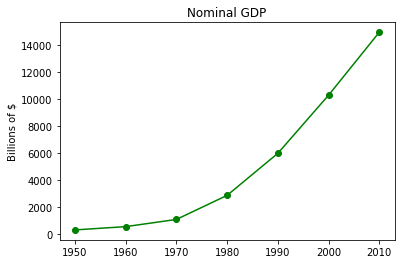

In [7]:
import matplotlib.pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

### Bar Charts

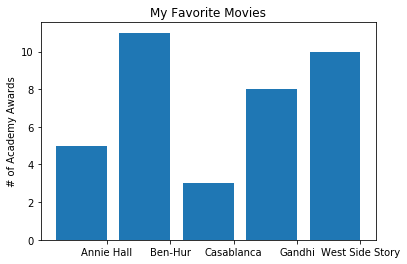

In [9]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

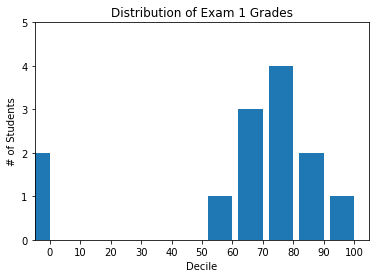

In [8]:
# Histogram
from collections import Counter

grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
        histogram.values(), # give each bar its correct height
        8) # give each bar a width of 8

plt.axis([-5, 105, 0, 5]) # x-axis from -5 to 105,
                          # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)]) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

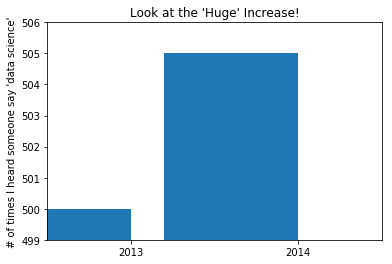

In [18]:
# Misleading Y axis
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

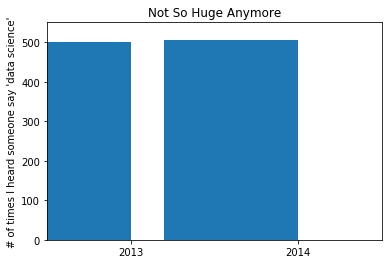

In [21]:
# No misleading
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

plt.ticklabel_format(useOffset=False)

plt.axis([2012.5,2014.5,0,550])
plt.title("Not So Huge Anymore")
plt.show()

### Line Charts

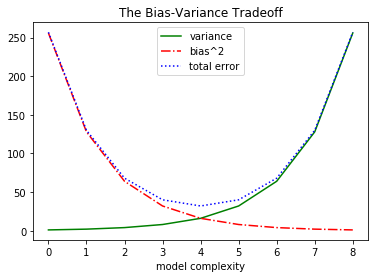

In [23]:
variance     = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# we can make multiple calls to plt.plot 
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()


### Scatterplots

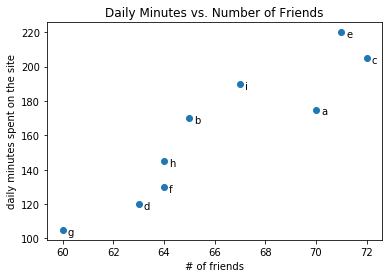

In [24]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 xy=(friend_count, minute_count), # put the label with its point
                 xytext=(5, -5), # but slightly offset
                 textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

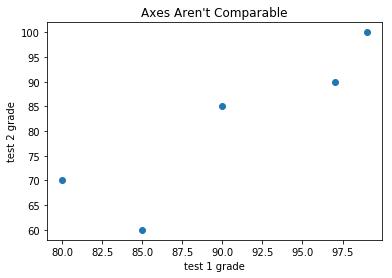

In [25]:
# Making matplotlib choose the scale
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

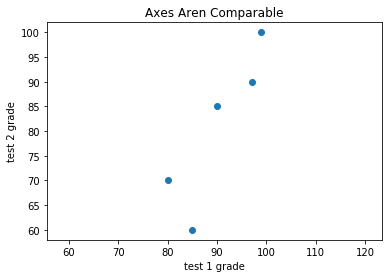

In [4]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.axis("equal")
plt.title("Axes Aren Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

### Piechart 

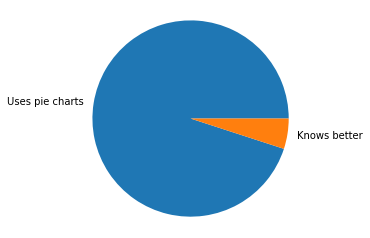

In [6]:
plt.pie([0.95, 0.05], labels=["Uses pie charts", "Knows better"])

# make sure pie is a circle and not an oval
plt.axis("equal")
plt.show()

## 4. Getting Data

### stdin and stdout

In [9]:
# Run these scripts at the command line
# 1. script that reads in lines of text and
#    spits back out the ones that match a regular expression
# egrep.py
import sys, re

# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
regex = sys.argv[1]

# for every line passed into the script
for line in sys.stdin:
# if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

In [12]:
# 2. script that counts the lines it receives and then writes out the count
# line_count.py
import sys

count = 0
for line in sys.stdin:
    count += 1

# print goes to sys.stdout
print(count)

0


In [17]:
# Use above files to count how many lines of a file contain numbers.
# In Windows, you'd use
# type SomeFile.txt | python egrep.py "[0-9]" | python line_count.py

# In Unix system, you'd use
# cat SomeFile.txt | python egrep.py "[0-9]" | python line_count.py

In [ ]:
# 3. script that counts the words in its input and writes out the most common ones
# most_common_words.py
import sys
from collections import Counter

# pass in number of words as first argument
try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1) # non-zero exit code indicates error
    
counter = Counter(word.lower() # lowercase words
                  for line in sys.stdin #
                  for word in line.strip().split() # split on spaces
                  if word) # skip empty 'words'

for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

# After you could do something like
# C:\DataScience>type the_bible.txt | python most_common_words.py 10

### The Basics of Text Files

In [ ]:
# Obtaining a file object
# 'r' means read-only
file_for_reading = open('reading_file.txt', 'r')

# 'w' is write—will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')

# 'a' is append—for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a')

# don't forget to close your files when you're done
file_for_writing.close()

In [ ]:
# Always use them in a WITH block, at the end of which they will be closed automatically
with open(filename,'r') as f:
    data = function_that_gets_data_from(f)
    
# at this point f has already been closed, so don't try to use it
process(data)

In [ ]:
# Iterate over the lines of a file using FOR
starts_with_hash = 0

with open('input.txt','r') as f:
    for line in file: # look at each line in the file
        if re.match("^#",line): # use a regex to see if it starts with '#'
            starts_with_hash += 1 # if it does, add 1 to the count

In [ ]:
# Get the addresses of emails in a file
def get_domain(email_address):
    """split on '@' and return the last piece"""
    return email_address.lower().split("@")[-1]

with open('email_addresses.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip())
                            for line in f
                            if "@" in line)

### Delimited Files

In [ ]:
import csv

# Tab-delimited file, get each row as a split list (including the header, if exists) using csv.reader
with open('tab_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)

# Colon-delimited file, skip the header row and get each row as a dict (with the headers as keys) using csv.DictReader
with open('colon_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])
        process(date, symbol, closing_price)

# Write out delimited data using csv.writer
today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }

with open('comma_delimited_stock_prices.txt','wb') as f:
    writer = csv.writer(f, delimiter=',')
    for stock, price in today_prices.items():
        writer.writerow([stock, price])

# csv.writer will do the right thing if your fields themselves have commas in them.
# Your own hand-rolled writer probably won’t.
results = [["test1", "success", "Monday"],
           ["test2", "success, kind of", "Tuesday"],
           ["test3", "failure, kind of", "Wednesday"],
           ["test4", "failure, utter", "Thursday"]]

# don't do this!
with open('bad_csv.txt', 'wb') as f:
    for row in results:
        f.write(",".join(map(str, row))) # might have too many commas in it!
        f.write("\n") # row might have newlines as well!

### Scraping the Web

In [3]:
# Install the packages if you didn't do yet
#!conda install -c conda-forge beautifulsoup4 --yes
#!conda install -c conda-forge lxml --yes
#!conda install -c conda-forge html5lib --yes
#!conda install -c conda-forge requests --yes

In [21]:
from bs4 import BeautifulSoup
import requests
html = requests.get("http://www.example.com").text
soup = BeautifulSoup(html, 'html5lib')
soup

<!DOCTYPE html>
<html><head>
    <title>Example Domain</title>

    <meta charset="utf-8"/>
    <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
    <meta content="width=device-width, initial-scale=1" name="viewport"/>
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 50px;
        background-color: #fff;
        border-radius: 1em;
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        body {
            background-color: #fff;
        }
        div {
            width: auto;
            margin: 0 auto;
            border-radius: 0;
            padding: 1em;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domain i

In [22]:
# Get the first <p> tag (and its contents)
first_paragraph = soup.find('p') # or just soup.p
first_paragraph

<p>This domain is established to be used for illustrative examples in documents. You may use this
    domain in examples without prior coordination or asking for permission.</p>

In [24]:
# Use de TEXT property to get the text contents of a TAG
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()
print("First Paragraph text: ", first_paragraph_text, "\n")
print("First Paragraph words: ", first_paragraph_words)

First Paragraph text:  This domain is established to be used for illustrative examples in documents. You may use this
    domain in examples without prior coordination or asking for permission. 

First Paragraph words:  ['This', 'domain', 'is', 'established', 'to', 'be', 'used', 'for', 'illustrative', 'examples', 'in', 'documents.', 'You', 'may', 'use', 'this', 'domain', 'in', 'examples', 'without', 'prior', 'coordination', 'or', 'asking', 'for', 'permission.']


In [29]:
# Extract a TAG attribute by treating it like a dict
#first_paragraph_id = soup.p['id'] # raises KeyError if no 'id'
first_paragraph_id2 = soup.p.get('id') # returns None if no 'id'
print(first_paragraph_id2)

None


In [31]:
# Get multiple tags at once
all_paragraphs = soup.find_all('p') # or just soup('p')
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]
print(paragraphs_with_ids)

[]


In [34]:
# Find tags with a specific class
important_paragraphs = soup('p', {'class' : 'important'})
print("Important paragraphs: ", important_paragraphs)
important_paragraphs2 = soup('p', 'important')
print("Important paragraphs 2: ", important_paragraphs2)
important_paragraphs3 = [p for p in soup('p')
                         if 'important' in p.get('class', [])]
print("Important paragraphs 3: ", important_paragraphs3)

Important paragraphs:  []
Important paragraphs 2:  []
Important paragraphs 3:  []


In [35]:
# Find every <span> element that is contained inside a <div> element
# warning, will return the same span multiple times
# if it sits inside multiple divs
# be more clever if that's the case
spans_inside_divs = [span
                     for div in soup('div') # for each <div> on the page
                     for span in div('span')] # find each <span> inside it
spans_inside_divs

[]

### Example: O'Reilly Books About Data

In [48]:
# you don't have to split the url like this unless it needs to fit in a book
url = "http://shop.oreilly.com/category/browse-subjects/data.do?sortby=publicationDate&page=1"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')
soup

<!DOCTYPE html>
<html lang="en"><head>
    <meta charset="utf-8"/>
    <meta content="#D3002D" name="theme-color"/>
    <meta content="width=device-width, initial-scale=1" name="viewport"/>
    <meta content="Gain technology and business knowledge and hone your skills with learning resources created and curated by O'Reilly's experts: live online training, video, books, conferences, our platform has content from 200+ of the world’s best publishers." name="description"/>

    <meta content="O'Reilly Media - Technology and Business Training" name="twitter:title"/>
    <meta content="Gain technology and business knowledge and hone your skills with learning resources created and curated by O'Reilly's experts: live online training, video, books, conferences, our platform has content from 200+ of the world’s best publishers." name="twitter:description"/>
    <meta content="@OReillyMedia" name="twitter:site"/>
    <meta content="website" property="og:type"/>
    <meta content="O'Reilly Media -

In [70]:
tds = soup('td', 'thumbtext')
print(len(tds))
# 0 if not found nothing

def is_video(td):
    """it's a video if it has exactly one pricelabel, and if
    the stripped text inside that pricelabel starts with 'Video'"""
    pricelabels = td('span', 'pricelabel')
    return (len(pricelabels) == 1 and
        pricelabels[0].text.strip().startswith("Video"))

print(len([td for td in tds if not is_video(td)]))
# 0 for me, might be different for you

0
0


In [ ]:
# Get a book title
title = td.find("div", "thumbheader").a.text

# Get the author's name
author_name = td.find('div', 'AuthorName').text
authors = [x.strip() for x in re.sub("^By ", "", author_name).split(",")]

# Get the ISBN
isbn_link = td.find("div", "thumbheader").a.get("href")

# re.match captures the part of the regex in parentheses
isbn = re.match("/product/(.*)\.do", isbn_link).group(1)

# Get the date
date = td.find("span", "directorydate").text.strip()

In [1]:
# Put all the above into a function
def book_info(td):
    """given a BeautifulSoup <td> Tag representing a book,
    extract the book's details and return a dict"""
    
    title = td.find("div", "thumbheader").a.text
    by_author = td.find('div', 'AuthorName').text
    authors = [x.strip() for x in re.sub("^By ", "", by_author).split(",")]
    isbn_link = td.find("div", "thumbheader").a.get("href")
    isbn = re.match("/product/(.*)\.do", isbn_link).groups()[0]
    date = td.find("span", "directorydate").text.strip()
    
    return {
        "title" : title,
        "authors" : authors,
        "isbn" : isbn,
        "date" : date
    }

In [2]:
# Start scraping
from bs4 import BeautifulSoup
import requests
from time import sleep
base_url = "http://shop.oreilly.com/category/browse-subjects/data.do?sortby=publicationDate&page="

books = []

NUM_PAGES = 31 # at the time of writing, probably more by now

for page_num in range(1, NUM_PAGES + 1):
    print("souping page", page_num, ",", len(books), " found so far")
    url = base_url + str(page_num)
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    
    for td in soup('td', 'thumbtext'):
        if not is_video(td):
            books.append(book_info(td))
    
    # now be a good citizen and respect the robots.txt!
    sleep(30)

souping page 1 , 0  found so far
souping page 2 , 0  found so far
souping page 3 , 0  found so far
souping page 4 , 0  found so far
souping page 5 , 0  found so far
souping page 6 , 0  found so far
souping page 7 , 0  found so far
souping page 8 , 0  found so far
souping page 9 , 0  found so far
souping page 10 , 0  found so far
souping page 11 , 0  found so far
souping page 12 , 0  found so far
souping page 13 , 0  found so far
souping page 14 , 0  found so far
souping page 15 , 0  found so far
souping page 16 , 0  found so far
souping page 17 , 0  found so far
souping page 18 , 0  found so far
souping page 19 , 0  found so far
souping page 20 , 0  found so far
souping page 21 , 0  found so far
souping page 22 , 0  found so far
souping page 23 , 0  found so far
souping page 24 , 0  found so far
souping page 25 , 0  found so far
souping page 26 , 0  found so far
souping page 27 , 0  found so far
souping page 28 , 0  found so far
souping page 29 , 0  found so far
souping page 30 , 0  fo

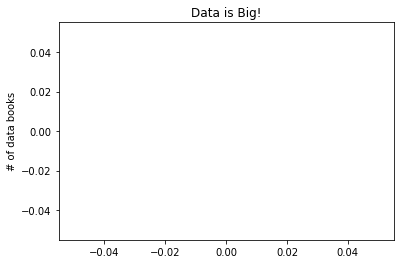

In [9]:
# Get the books published each year
def get_year(book):
    """book["date"] looks like 'November 2014' so we need to
    split on the space and then take the second piece"""
    return int(book["date"].split()[1])

# 2014 is the last complete year of data (when I ran this)
year_counts = Counter(get_year(book) for book in books
                      if get_year(book) <= 2014)

import matplotlib.pyplot as plt
years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
plt.plot(years, book_counts)
plt.ylabel("# of data books")
plt.title("Data is Big!")
plt.show()

### Using APIs

#### JSON (and XML)

In [10]:
# Parsing JSON
import json
serialized = """{ "title" : "Data Science Book", 
                  "author" : "Joel Grus", "publicationYear" : 2014, 
                  "topics" : [ "data", "science", "data science"] }"""

# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print(deserialized)

{'title': 'Data Science Book', 'topics': ['data', 'science', 'data science'], 'publicationYear': 2014, 'author': 'Joel Grus'}


#### Using and Unauthenticated API

In [13]:
import requests, json
endpoint = "https://api.github.com/users/joelgrus/repos"

repos = json.loads(requests.get(endpoint).text)
repos

[{'archive_url': 'https://api.github.com/repos/joelgrus/advent2017/{archive_format}{/ref}',
  'archived': False,
  'assignees_url': 'https://api.github.com/repos/joelgrus/advent2017/assignees{/user}',
  'blobs_url': 'https://api.github.com/repos/joelgrus/advent2017/git/blobs{/sha}',
  'branches_url': 'https://api.github.com/repos/joelgrus/advent2017/branches{/branch}',
  'clone_url': 'https://github.com/joelgrus/advent2017.git',
  'collaborators_url': 'https://api.github.com/repos/joelgrus/advent2017/collaborators{/collaborator}',
  'comments_url': 'https://api.github.com/repos/joelgrus/advent2017/comments{/number}',
  'commits_url': 'https://api.github.com/repos/joelgrus/advent2017/commits{/sha}',
  'compare_url': 'https://api.github.com/repos/joelgrus/advent2017/compare/{base}...{head}',
  'contents_url': 'https://api.github.com/repos/joelgrus/advent2017/contents/{+path}',
  'contributors_url': 'https://api.github.com/repos/joelgrus/advent2017/contributors',
  'created_at': '2017-12-

In [ ]:
# Install the packages if you didn't do yet
#!conda install -c conda-forge python-dateutil --yes

In [19]:
from dateutil.parser import parse

dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

print("Dates: ", dates, "\n")
print("Month counts: ", month_counts, "\n")
print("Week counts: ", weekday_counts)

Dates:  [datetime.datetime(2017, 12, 2, 20, 13, 49, tzinfo=tzlocal()), datetime.datetime(2018, 11, 30, 22, 41, 16, tzinfo=tzlocal()), datetime.datetime(2018, 2, 23, 15, 51, 4, tzinfo=tzlocal()), datetime.datetime(2017, 12, 19, 0, 12, 40, tzinfo=tzlocal()), datetime.datetime(2018, 1, 31, 23, 51, 16, tzinfo=tzlocal()), datetime.datetime(2018, 12, 19, 19, 44, 45, tzinfo=tzlocal()), datetime.datetime(2018, 9, 5, 2, 43, 52, tzinfo=tzlocal()), datetime.datetime(2013, 7, 5, 2, 2, 28, tzinfo=tzlocal()), datetime.datetime(2017, 5, 10, 17, 22, 45, tzinfo=tzlocal()), datetime.datetime(2013, 11, 15, 5, 33, 22, tzinfo=tzlocal()), datetime.datetime(2012, 9, 18, 4, 20, 23, tzinfo=tzlocal()), datetime.datetime(2016, 7, 19, 17, 34, 31, tzinfo=tzlocal()), datetime.datetime(2015, 11, 11, 14, 15, 36, tzinfo=tzlocal()), datetime.datetime(2016, 5, 31, 14, 33, 6, tzinfo=tzlocal()), datetime.datetime(2018, 9, 22, 15, 23, 50, tzinfo=tzlocal()), datetime.datetime(2015, 6, 30, 0, 33, 3, tzinfo=tzlocal()), dateti

In [20]:
last_5_repositories = sorted(repos,
                             key=lambda r: r["created_at"],
                             reverse=True)[:5]

last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

print("Repositories: ", last_5_repositories, "\n")
print("Languages: ", last_5_languages)

Repositories:  [{'downloads_url': 'https://api.github.com/repos/joelgrus/allennlp-demo/downloads', 'milestones_url': 'https://api.github.com/repos/joelgrus/allennlp-demo/milestones{/number}', 'events_url': 'https://api.github.com/repos/joelgrus/allennlp-demo/events', 'pushed_at': '2018-12-21T18:47:04Z', 'owner': {'starred_url': 'https://api.github.com/users/joelgrus/starred{/owner}{/repo}', 'node_id': 'MDQ6VXNlcjEzMDgzMTM=', 'received_events_url': 'https://api.github.com/users/joelgrus/received_events', 'events_url': 'https://api.github.com/users/joelgrus/events{/privacy}', 'site_admin': False, 'url': 'https://api.github.com/users/joelgrus', 'avatar_url': 'https://avatars1.githubusercontent.com/u/1308313?v=4', 'organizations_url': 'https://api.github.com/users/joelgrus/orgs', 'subscriptions_url': 'https://api.github.com/users/joelgrus/subscriptions', 'html_url': 'https://github.com/joelgrus', 'gists_url': 'https://api.github.com/users/joelgrus/gists{/gist_id}', 'type': 'User', 'followi

### Example: Using the Twitter APIs

In [3]:
# Install the packages if you didn't do yet
!conda install -c conda-forge twython --yes
print("Instalado con éxito")

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    blinker:           1.4-py_1   conda-forge
    oauthlib:          2.1.0-py_0 conda-forge
    pyjwt:             1.7.1-py_0 conda-forge
    requests-oauthlib: 1.0.0-py_1 conda-forge
    twython:           3.7.0-py_0 conda-forge

blinker-1.4-py 100% |################################| Time: 0:00:00  15.02 MB/s
pyjwt-1.7.1-py 100% |################################| Time: 0:00:00  21.99 MB/s
oauthlib-2.1.0 100% |################################| Time: 0:00:00  38.55 MB/s
requests-oauth 100% |################################| Time: 0:00:00  24.34 MB/s
twython-3.7.0- 100% |################################| Time: 0:00:00  34.16 MB/s
Instalado con éxito


In [3]:
# Credentials (put your access credentials obtained in https://apps.twitter.com/)
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
ACCESS_TOKEN = ""
ACCESS_TOKEN_SECRET = ""

In [6]:
# Search API
from twython import Twython

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

# search for tweets containing the phrase "data science"
for status in twitter.search(q='"data science"')["statuses"]:
    user = status["user"]["screen_name"].encode('utf-8')
    text = status["text"].encode('utf-8')
    print(user, ":", text)
    print("\n")

b'zorm' : b"RT @physicsmatt: I didn't realize how much of data science was just getting data in a format where you could do science."


b'cschultzwx' : b"RT @physicsmatt: I didn't realize how much of data science was just getting data in a format where you could do science."


b'fiestybath' : b'2nd note to self: write data science project on crime prediction algorithms'


b'Comatose_D' : b'RT @ProgrammerBooks: Top 3 Best Data Science Books You Should Read : https://t.co/s6cSocVYS1\n#python #javascript #angular #angularjs #react\xe2\x80\xa6'


b'TheDestinyMan' : b'RT @Mathesia_: Algorithm design for Data Science, Numerical Simulation &amp; Optimization.\xc2\xa0\nSee more on https://t.co/KVas5aLE5R https://t.co/H8\xe2\x80\xa6'


b'libresteban' : b'RT @ProgrammerBooks: Top 3 Best Data Science Books You Should Read : https://t.co/s6cSocVYS1\n#python #javascript #angular #angularjs #react\xe2\x80\xa6'


b'ProcurementStar' : b'RT @NIRAV_88: RT andi_staub: Role of #ComputerScience in #DataSci

In [1]:
# Streaming API
from twython import TwythonStreamer

# appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = [] 

class MyStreamer(TwythonStreamer):
    """our own subclass of TwythonStreamer that specifies
    how to interact with the stream"""

    def on_success(self, data):
        """what do we do when twitter sends us data?
        here data will be a Python object representing a tweet"""

        # only want to collect English-language tweets
        if data['lang'] == 'en':
            tweets.append(data)

        # stop when we've collected enough (you can select your own limit)
        if len(tweets) >= 100:
            self.disconnect()

    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

In [4]:
# Using the above class
stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET, 
                    ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# starts consuming public statuses that contain the keyword 'data'
stream.statuses.filter(track='data')

# if instead we wanted to start consuming a sample of *all* public statuses
# stream.statuses.sample()

In [7]:
# Find the most common hashtags
top_hashtags = Counter(hashtag['text'].lower()
                       for tweet in tweets
                       for hashtag in tweet["entities"]["hashtags"])

print(top_hashtags.most_common(5))

[('theresistance', 2), ('dataviz', 2), ('gdpr', 1), ('ottawa', 1), ('2point0', 1)]
